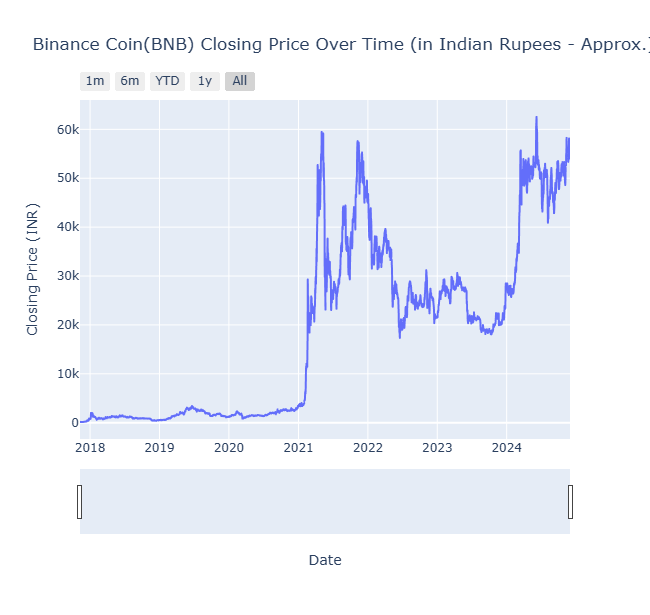

In [1]:
# सुनिश्चित करें कि आपके पास आवश्यक लाइब्रेरीज़ स्थापित हैं:
# pip install plotly pandas

import pandas as pd
import plotly.express as px

# --- 1. कॉन्फ़िगरेशन ---
# आज की विनिमय दर का अनुमान (USD to INR)।
USD_TO_INR_RATE = 88.02145 
file_name = "BNB-USD From 2017 To Dec-2024.csv"

# --- 2. डेटा लोडिंग और तैयारी ---

# त्रुटि समाधान: पहले 'utf-8' का प्रयास करें, फिर 'latin-1' का उपयोग करें
try:
    df = pd.read_csv(file_name, encoding='utf-8') 
except UnicodeDecodeError:
    df = pd.read_csv(file_name, encoding='latin-1')
    
# 'Date' कॉलम को datetime ऑब्जेक्ट में बदलें
df['Date'] = pd.to_datetime(df['Date'])

# --- 3. मुद्रा परिवर्तन (INR Conversion) ---

# USD में Open और Close कीमतों को INR में बदलें
df['Open Price (INR)'] = df['Open'] * USD_TO_INR_RATE
df['Close Price (INR)'] = df['Close'] * USD_TO_INR_RATE

# --- 4. इंटरैक्टिव प्लॉट बनाना (Plotly Express) ---

fig = px.line(df,
              x='Date',
              y='Close Price (INR)',
              title='Binance Coin(BNB) Closing Price Over Time (in Indian Rupees - Approx.)',
              # Hover_data (Tooltip) में दिखाने के लिए अतिरिक्त जानकारी:
              hover_data={'Date': '|%Y-%m-%d',
                          'Open Price (INR)': ':.2f',
                          'Close Price (INR)': ':.2f',
                          'Close': False}
             )

# --- 5. ड्रिल-डाउन/ज़ूम और साइज़ सुविधाएँ जोड़ना ---

# X-axis में रेंज स्लाइडर जोड़ना
fig.update_xaxes(
    rangeslider_visible=True,
    # रेंज सेलेक्टर बटन जोड़ना
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all", label="All")
        ])
    )
)

# प्लॉट लेआउट और साइज़ अपडेट करना
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Closing Price (INR)",
    hovermode="x unified",
    # यह साइज़ 10x6 के अनुपात में 1000x600 पिक्सल सेट करता है
    width=800,
    height=600
)

# जुपिटर नोटबुक में प्लॉट प्रदर्शित करना
fig.show()

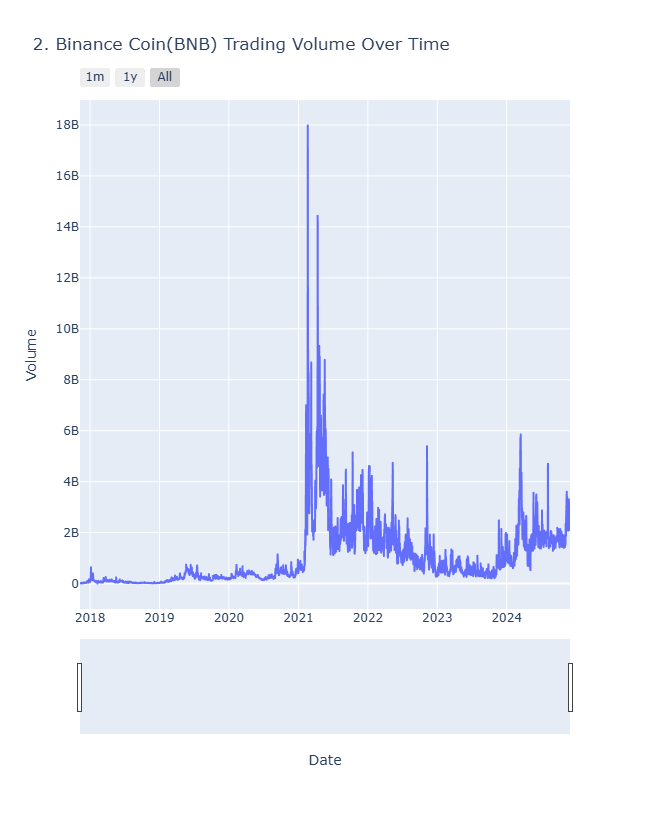

In [2]:
import pandas as pd
import plotly.express as px

# --- डेटा लोडिंग और तैयारी ---
USD_TO_INR_RATE = 88.02145
file_name = "BNB-USD From 2017 To Dec-2024.csv"

# त्रुटि समाधान: 'latin-1' एन्कोडिंग का उपयोग करें
try:
    df = pd.read_csv(file_name, encoding='latin-1')
except Exception as e:
    print(f"Error reading file: {e}")
    df = pd.read_csv(file_name)

df['Date'] = pd.to_datetime(df['Date'])

df['Open Price (INR)'] = df['Open'] * USD_TO_INR_RATE
df['Close Price (INR)'] = df['Close'] * USD_TO_INR_RATE

# --- प्लॉट बनाना ---
fig = px.line(df,
              x='Date',
              y='Volume',
              title='2. Binance Coin(BNB) Trading Volume Over Time')

# ड्रिल-डाउन सुविधा जोड़ना
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all", label="All")
        ])
    )
)

# लेआउट और साइज़ सेट करना
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Volume",
    hovermode="x unified",
    width=1000,
    height=800
)

# प्लॉट प्रदर्शित करना
fig.show()

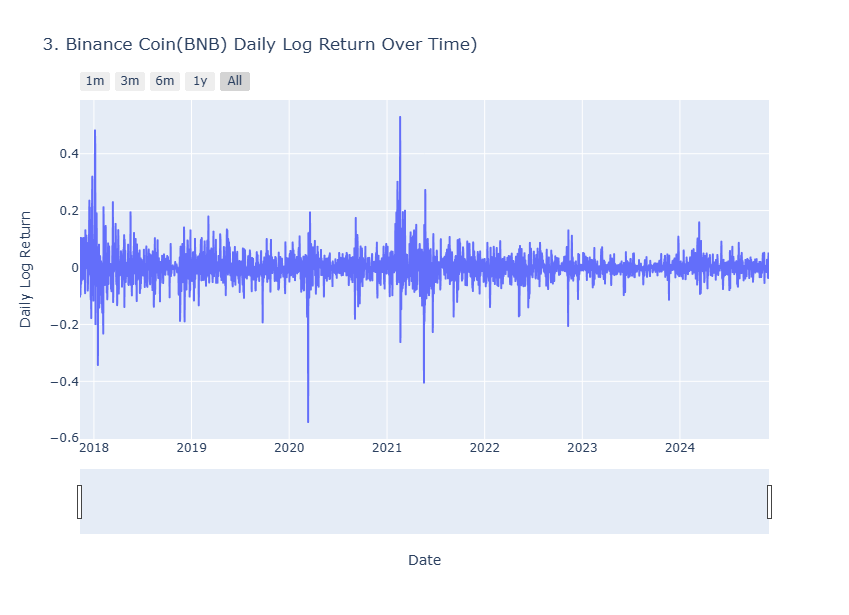

In [3]:
import pandas as pd
import plotly.express as px
import numpy as np

# --- डेटा लोडिंग और तैयारी ---
file_name = "BNB-USD From 2017 To Dec-2024.csv"

# त्रुटि समाधान: 'latin-1' एन्कोडिंग का उपयोग करें
try:
    df = pd.read_csv(file_name, encoding='latin-1')
except Exception as e:
    print(f"Error reading file: {e}")
    df = pd.read_csv(file_name)

df['Date'] = pd.to_datetime(df['Date'])

# Log Return कॉलम को साफ़ करें और NaN/Inf हटा दें
df['Log Return'] = pd.to_numeric(df['Log Return'], errors='coerce')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['Log Return'], inplace=True)

# **अपडेट**: Log Return को प्रतिशत (%) में बदलें
df['Log Return (%)'] = df['Log Return'] * 100

# --- प्लॉट बनाना ---
fig = px.line(df,
              x='Date',
              y='Log Return',
              title='3. Binance Coin(BNB) Daily Log Return Over Time)')

# ड्रिल-डाउन सुविधा जोड़ना
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all", label="All")
        ])
    )
)

# लेआउट और साइज़ सेट करना
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Daily Log Return",
    hovermode="x unified",
    width=1000,
    height=600
)

# प्लॉट प्रदर्शित करना
fig.show()

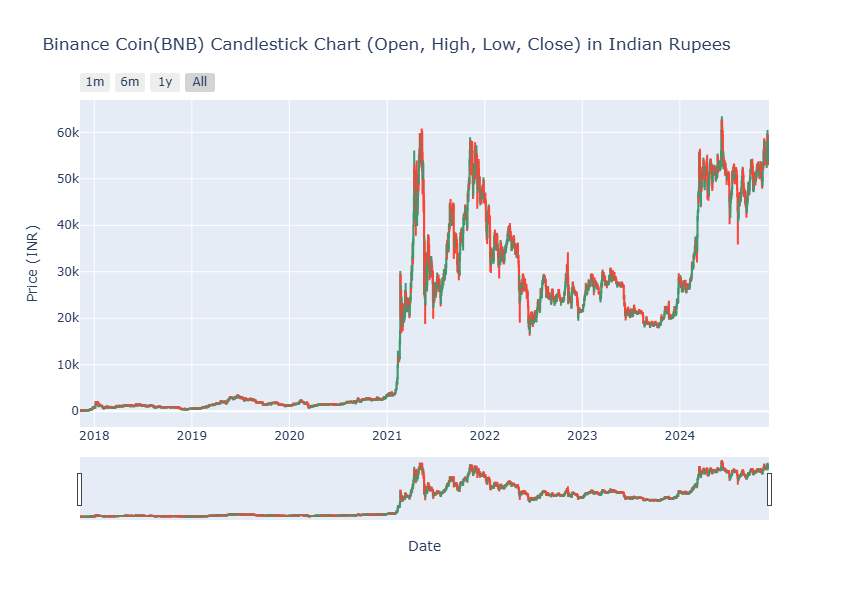

In [4]:
# सुनिश्चित करें कि आपके पास आवश्यक लाइब्रेरीज़ स्थापित हैं:
# pip install plotly pandas

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px # Rangeslider setup के लिए

# --- 1. कॉन्फ़िगरेशन और डेटा लोडिंग ---
# आज की विनिमय दर का अनुमान (USD to INR)
USD_TO_INR_RATE = 88.02145 
file_name = "BNB-USD From 2017 To Dec-2024.csv"

# त्रुटि समाधान: 'latin-1' एन्कोडिंग का उपयोग करें
try:
    df = pd.read_csv(file_name, encoding='latin-1')
except Exception:
    print("Warning: Could not read file with 'latin-1' encoding. Using default.")
    df = pd.read_csv(file_name)

df['Date'] = pd.to_datetime(df['Date'])

# --- 2. INR कन्वर्ज़न ---

# Candlestick chart के लिए Open, High, Low, Close को INR में बदलें
df['Open Price (INR)'] = df['Open'] * USD_TO_INR_RATE
df['High Price (INR)'] = df['High'] * USD_TO_INR_RATE
df['Low Price (INR)'] = df['Low'] * USD_TO_INR_RATE
df['Close Price (INR)'] = df['Close'] * USD_TO_INR_RATE

# --- 3. Candlestick चार्ट बनाना ---

fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open Price (INR)'],
    high=df['High Price (INR)'],
    low=df['Low Price (INR)'],
    close=df['Close Price (INR)'],
    name='BNB/INR Price Action'
)])

# --- 4. लेआउट और ड्रिल-डाउन सुविधाएँ जोड़ना ---

# Candlestick chart के लिए लेआउट, जिसमें rangeslider_visible को सीधे x-axis में सेट किया जाता है
fig.update_layout(
    title='Binance Coin(BNB) Candlestick Chart (Open, High, Low, Close) in Indian Rupees',
    xaxis_title='Date',
    yaxis_title='Price (INR)',
    width=800, # साइज़ 10 के अनुपात में
    height=600, # साइज़ 6 के अनुपात में
    # ड्रिल-डाउन/रेंज स्लाइडर जोड़ना
    xaxis_rangeslider_visible=True,
    xaxis_rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all", label="All")
        ])
    )
)

# यदि आप चाहते हैं कि केवल कीमतें ही दिखें और वॉल्यूम आदि पर ज़ूम न हो
fig.update_yaxes(
    fixedrange=False # Y-axis को ज़ूम इन की अनुमति दें
)

# प्लॉट प्रदर्शित करना
fig.show()

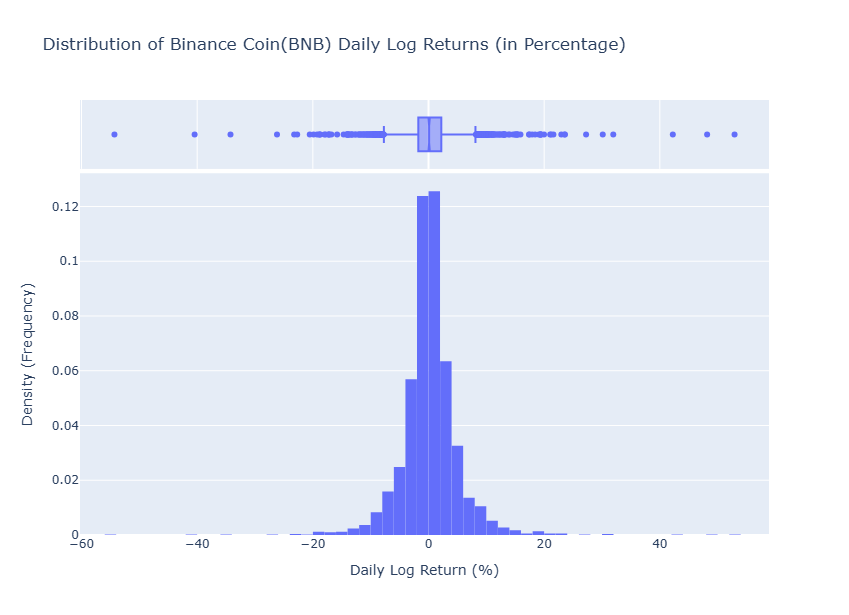

In [5]:
# सुनिश्चित करें कि आपके पास आवश्यक लाइब्रेरीज़ स्थापित हैं:
# pip install plotly pandas numpy

import pandas as pd
import plotly.express as px
import numpy as np

# --- 1. कॉन्फ़िगरेशन और डेटा लोडिंग ---
file_name = "BNB-USD From 2017 To Dec-2024.csv"

# त्रुटि समाधान: 'latin-1' एन्कोडिंग का उपयोग करें
try:
    df = pd.read_csv(file_name, encoding='latin-1')
except Exception:
    print("Warning: Could not read file with 'latin-1' encoding. Using default.")
    df = pd.read_csv(file_name)

# --- 2. Log Return की तैयारी और सफाई ---

# Log Return कॉलम को साफ़ करें और प्रतिशत में बदलें
df['Log Return'] = pd.to_numeric(df['Log Return'], errors='coerce')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# NaN वैल्यूज़ को हटाना हिस्टोग्राम के लिए महत्वपूर्ण है
df.dropna(subset=['Log Return'], inplace=True) 

# Log Return को प्रतिशत (%) में बदलें
df['Log Return (%)'] = df['Log Return'] * 100

# --- 3. हिस्टोग्राम प्लॉट बनाना ---

# Plotly Express का उपयोग करके हिस्टोग्राम और KDE (Kernel Density Estimate - घनत्व वक्र) बनाएं
fig = px.histogram(df, 
                   x='Log Return (%)',
                   nbins=80,  # बिन्स की संख्या (वितरण को और अधिक विस्तृत देखने के लिए)
                   marginal="box", # ऊपर एक बॉक्स प्लॉट जोड़ें
                   histnorm='probability density', # Y-axis पर घनत्व (Density) दिखाएं
                   title='Distribution of Binance Coin(BNB) Daily Log Returns (in Percentage)')

# --- 4. लेआउट सेटिंग्स ---

fig.update_layout(
    xaxis_title="Daily Log Return (%)",
    yaxis_title="Density (Frequency)",
    hovermode="x unified",
    width=1000, # साइज़ 10 के अनुपात में
    height=600, # साइज़ 6 के अनुपात में
    bargap=0.01 # बार के बीच का छोटा गैप
)

# यदि आप चाहते हैं कि घनत्व वक्र (KDE) भी दिखे:
fig.update_traces(
    # KDE वक्र को जोड़ना (घनत्व को चिकना करने के लिए)
    selector=dict(type='histogram'), 
    # KDE को जोड़ने के लिए marginal="box" के बजाय marginal="kde" का उपयोग करें
    # या फिर केवल हिस्टोग्राम के लिए इस सेटिंग को हटा दें। 
)

# प्लॉट प्रदर्शित करना
fig.show()

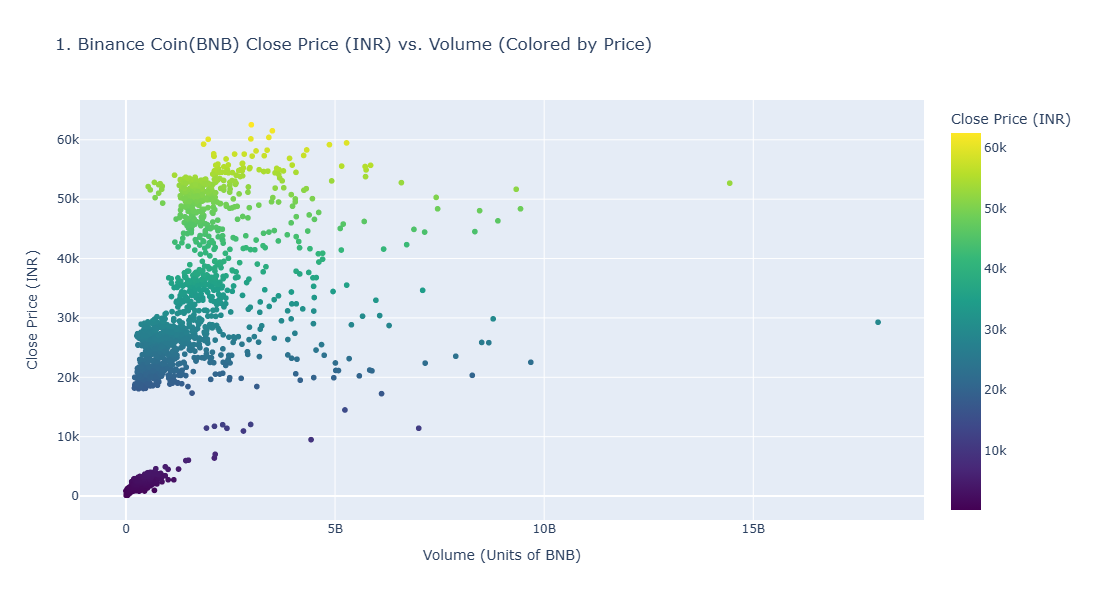

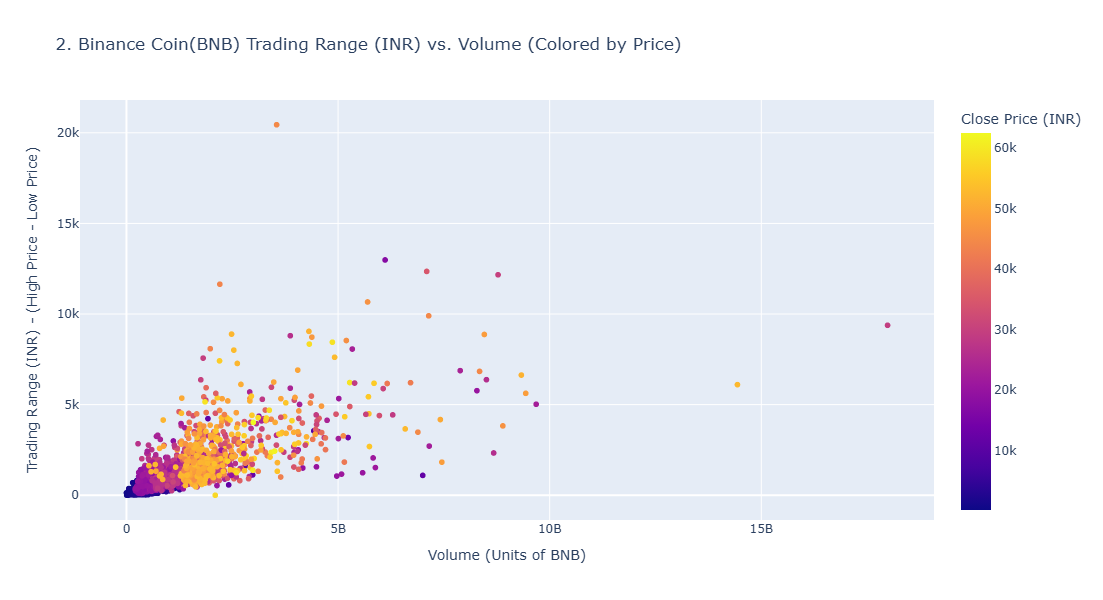

In [8]:
import pandas as pd
import plotly.express as px

# --- 1. कॉन्फ़िगरेशन और डेटा लोडिंग ---
# आज की विनिमय दर का अनुमान (USD to INR)
USD_TO_INR_RATE = 88.02145 
file_name = "BNB-USD From 2017 To Dec-2024.csv"

# त्रुटि समाधान: 'latin-1' एन्कोडिंग का उपयोग करें
try:
    df = pd.read_csv(file_name, encoding='latin-1')
except Exception:
    print("Warning: Could not read file with 'latin-1' encoding. Using default.")
    df = pd.read_csv(file_name)

df['Date'] = pd.to_datetime(df['Date'])

# --- 2. INR कन्वर्ज़न ---
df['Close Price (INR)'] = df['Close'] * USD_TO_INR_RATE
df['Trading Range (INR)'] = df['Trading Range'] * USD_TO_INR_RATE


# --- 3. स्कैटर प्लॉट 1: Price (INR) vs. Volume (Close Price द्वारा रंगीन) ---
fig1 = px.scatter(df, 
                  x='Volume', 
                  y='Close Price (INR)', 
                  color='Close Price (INR)', # <--- Color based on Close Price
                  color_continuous_scale=px.colors.sequential.Viridis, # रंग स्केल
                  title='1. Binance Coin(BNB) Close Price (INR) vs. Volume (Colored by Price)',
                  hover_data={'Date': True, 'Close Price (INR)': ':.2f', 'Volume': ':.0f'}) 

fig1.update_layout(
    xaxis_title='Volume (Units of BNB)',
    yaxis_title='Close Price (INR)',
    hovermode="closest",
    width=1000,
    height=600
)
fig1.show()


# --- 4. स्कैटर प्लॉट 2: Trading Range (INR) vs. Volume (Close Price द्वारा रंगीन) ---
fig2 = px.scatter(df, 
                  x='Volume', 
                  y='Trading Range (INR)', 
                  color='Close Price (INR)', # <--- Color based on Close Price
                  color_continuous_scale=px.colors.sequential.Plasma, # अलग रंग स्केल
                  title='2. Binance Coin(BNB) Trading Range (INR) vs. Volume (Colored by Price)',
                  hover_data={'Date': True, 'Trading Range (INR)': ':.2f', 'Volume': ':.0f'}) 

fig2.update_layout(
    xaxis_title='Volume (Units of BNB)',
    yaxis_title='Trading Range (INR) - (High Price - Low Price)',
    hovermode="closest",
    width=1000,
    height=600
)
fig2.show()

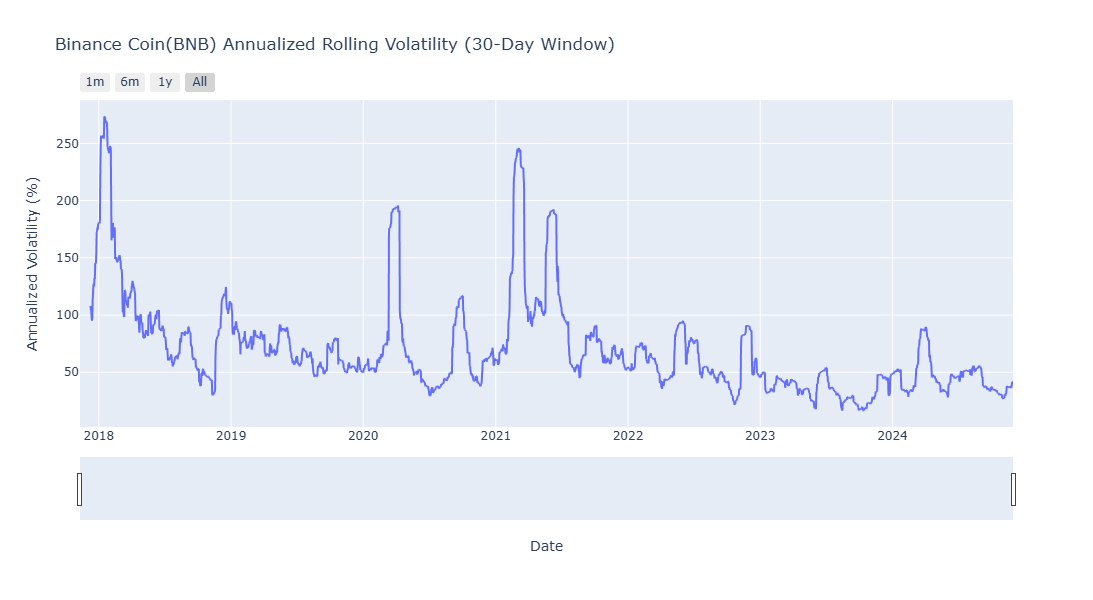

In [7]:
# सुनिश्चित करें कि आपके पास आवश्यक लाइब्रेरीज़ स्थापित हैं:
# pip install plotly pandas numpy

import pandas as pd
import plotly.express as px
import numpy as np

# --- 1. कॉन्फ़िगरेशन और डेटा लोडिंग ---
file_name = "BNB-USD From 2017 To Dec-2024.csv"
WINDOW = 30 # 30-दिन की रोलिंग विंडो
ANNUALIZATION_FACTOR = np.sqrt(252) # वार्षिककरण के लिए कारक (252 ट्रेडिंग दिन)

# त्रुटि समाधान: 'latin-1' एन्कोडिंग का उपयोग करें
try:
    df = pd.read_csv(file_name, encoding='latin-1')
except Exception:
    print("Warning: Could not read file with 'latin-1' encoding. Using default.")
    df = pd.read_csv(file_name) 

df['Date'] = pd.to_datetime(df['Date'])

# --- 2. Log Return की तैयारी और सफाई ---
df['Log Return'] = pd.to_numeric(df['Log Return'], errors='coerce')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['Log Return'], inplace=True)

# --- 3. रोलिंग अस्थिरता (Rolling Volatility) की गणना ---
# 30-दिन की रोलिंग मानक विचलन (Standard Deviation) की गणना
df['Rolling Volatility (Daily)'] = df['Log Return'].rolling(window=WINDOW).std()

# वार्षिक अस्थिरता (Annualized Volatility) की गणना और प्रतिशत में बदलना
df['Annualized Volatility (%)'] = df['Rolling Volatility (Daily)'] * ANNUALIZATION_FACTOR * 100

# --- 4. प्लॉट बनाना ---
fig = px.line(df,
              x='Date',
              y='Annualized Volatility (%)',
              title=f'Binance Coin(BNB) Annualized Rolling Volatility ({WINDOW}-Day Window)')

# --- 5. लेआउट और ड्रिल-डाउन सुविधाएँ जोड़ना ---
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all", label="All")
        ])
    )
)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Annualized Volatility (%)",
    hovermode="x unified",
    width=1000,
    height=600
)

# प्लॉट प्रदर्शित करना
fig.show()

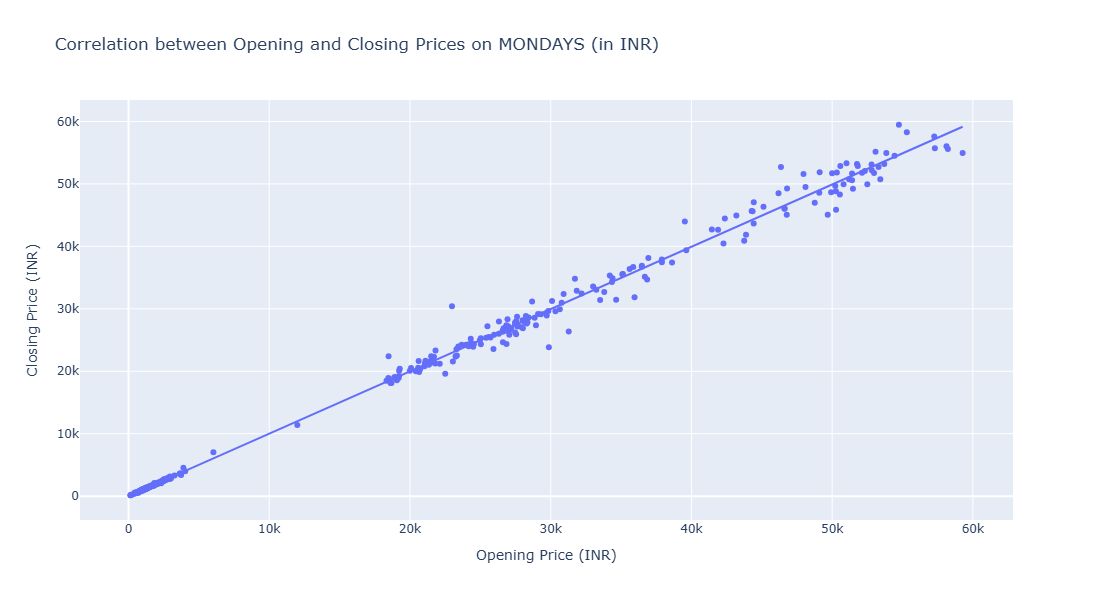

In [6]:
# सुनिश्चित करें कि आपके पास सभी आवश्यक लाइब्रेरीज़ स्थापित हैं:
# !pip install pandas plotly statsmodels

import pandas as pd
import plotly.express as px

# --- 1. कॉन्फ़िगरेशन और डेटा लोडिंग ---
USD_TO_INR_RATE = 88.02145 # अनुमानित विनिमय दर
file_name = "BNB-USD From 2017 To Dec-2024.csv"

# त्रुटि समाधान: 'latin-1' एन्कोडिंग का उपयोग करें
try:
    df = pd.read_csv(file_name, encoding='latin-1')
except Exception:
    print("Warning: Could not read file with 'latin-1' encoding.")
    df = pd.read_csv(file_name) 

# 'Date' कॉलम को datetime ऑब्जेक्ट में बदलें
df['Date'] = pd.to_datetime(df['Date'])

# --- 2. डेटा को सोमवार के लिए फ़िल्टर करें और INR में बदलें ---

# सोमवार (Monday) के लिए डेटा फ़िल्टर करें (dayofweek 0 = Monday)
df_monday = df[df['Date'].dt.dayofweek == 0].copy()

# INR में कीमतों की गणना करें
df_monday['Open Price (INR)'] = df_monday['Open'] * USD_TO_INR_RATE
df_monday['Close Price (INR)'] = df_monday['Close'] * USD_TO_INR_RATE

# --- 3. स्कैटर प्लॉट (Correlation Chart) बनाना ---

fig = px.scatter(df_monday, 
                 x='Open Price (INR)', 
                 y='Close Price (INR)', 
                 trendline='ols', # OLS (Ordinary Least Squares) सहसंबंध रेखा
                 title='Correlation between Opening and Closing Prices on MONDAYS (in INR)',
                 hover_data={'Date': True}) 

# --- 4. लेआउट और साइज़ सेटिंग्स ---
fig.update_layout(
    xaxis_title='Opening Price (INR)',
    yaxis_title='Closing Price (INR)',
    width=1000,
    height=600
)

# प्लॉट प्रदर्शित करना
fig.show()